In [1]:
import numpy as np
from scipy.optimize import minimize, Bounds
import matplotlib.pyplot as plt

In [5]:
W = 10
L = 10
H = 10

3.141592653589793

In [4]:
def cost(n, z):
    return 895*n + (3+0.25*H)*n*(100+15*(H-z))

In [7]:
# Constraints

# variables: n, xf, yf, zf
position_bounds = Bounds([0,0,0], [W, L, H])
number_bounds = Bounds(0, np.inf)
intensity_bounds = Bounds(300, 500)

def light_intensity(n, x, y, xf, yf, zf):
    intensity = 0
    for i in range(1, n+1):
        intensity += 70661/(4*np.pi*(zf[i]**2+(x-xf[i])**2+(y-yf[i])**2))
    return intensity

In [36]:
def get_points(n):
    perimeter = 2*W + 2*H
    spacing = perimeter/n
    x = []
    y = []
    posn = [0,0]
    
    for i in range(n):
        if posn[0] < W:
            if spacing <= W and (posn[0] + spacing) <= W:
                x0 = spacing
                y0 = posn[1]
            else:
                x0 = W
                y0 = spacing - posn[0]
        else:
            if spacing <= H and (posn[1] + spacing) <= H:
                x0 = posn[0]
                y0 = spacing
            else:
                x0 = H - posn[1]
                y0 = H
        if x0 == W and y0 == H:
            x0, y0 = 0, 0
        x.append(x0)
        y.append(y0)
        posn = [x0, y0]
#         print(posn)
    return zip(x, y)

In [38]:
W = 20
H = 10
points = get_points(4)
for i in points:
    print(i)

(15.0, 0)
(20, 0.0)
(10.0, 10)
(20, 5.0)


In [27]:
60/4

15.0

In [14]:
# Given, meters
h = 1
l = 20
w = 19
unit_price = 895
watts = 70661

# Constraints
min_z = 2
max_z = h
min_i = 300
max_i = 500

# Variables
# position, in metres of each light
num_lights = 0
pos_x = []
pos_y = []
pos_z = 4

# This funct is given point_x and point_y in m
def get_lux(point_x, point_y, n):
    i = 0
    for m in range(n):
        i += watts / ((4 * np.pi) * (pos_z**2 + (point_x - pos_x[m])**2 + (point_y - pos_y[m])**2))
    return i

def set_starting_points(n):
    pos_x = []
    pos_y = []
    p = (l+w)*2

    seg = p/n

    for i in range(n):
        dist = seg*i

        if dist <= l:
            pos_x.append(dist)
            pos_y.append(0)
        elif l < dist <= l+w:
            pos_x.append(l)
            pos_y.append(dist-l)
        elif l+w < dist <= (2*l)+w:
            pos_x.append(l-(dist-(l+w)))
            pos_y.append(w)
        elif (2*l)+w < dist:
            pos_x.append(0)
            pos_y.append(w-(dist-((2*l)+w)))
    print("starting point: ", pos_x, pos_y)
    return pos_x, pos_y

def move_lights(n):
    mid_x = l*0.5
    mid_y = w*0.5
    for i in range(n):
        x = pos_x[i]
        y = pos_y[i]

        if mid_x > x:
            pos_x[i] += 0.01
        elif mid_x < x:
            pos_x[i] -= 0.01

        if mid_y > y:
            pos_y[i] += 0.01
        elif mid_y < y:
            pos_y[i] -= 0.01
    return

def move(n, mid_x, mid_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        try:
            if x0-0.1 <= mid_x <= x0+0.1 or y0-0.1 <= mid_y <= y0+0.1:
                print("add a light!")
                return False

            if x0 < mid_x:
                x = x0+0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
            else: # x0 > mid_x:
                x = x0-0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
    #         print(x, mid_x, y, mid_y)
    #         if x-1 <= mid_x <= x+1 and y-1 <= mid_y <= y+1:
    #             print("add a light!")
    #             return False
        except:
            print(mid_x, x0, x0-0.1<=mid_x<=x0+0.1)
            raise ValueError
        
        pos_x[i] = x
        pos_y[i] = y
#         print(pos_x, pos_y)
    return True

def get_hours():
    hours = 3 * (0.25 * h)
    return hours

def get_labor_cost(n):
    time = get_hours()
    cost = time * n * (100 + (15 * (h - pos_z)))
    return cost

starting point:  [0.0] [0]
add a light!
starting point:  [0.0, 20] [0, 19.0]
add a light!
starting point:  [0.0, 20, 7.0] [0, 6.0, 19]
add a light!
starting point:  [0.0, 19.5, 20, 0.5] [0, 0, 19.0, 19]
add a light!
starting point:  [0.0, 15.6, 20, 12.200000000000003, 0] [0, 0, 11.2, 19, 15.600000000000001]
add a light!
starting point:  [0.0, 13.0, 20, 20, 7.0, 0] [0, 0, 6.0, 19.0, 19, 13.0]
add a light!
starting point:  [0.0, 11.142857142857142, 20, 20, 14.42857142857143, 3.285714285714292, 0] [0, 0, 2.2857142857142847, 13.42857142857143, 19, 19, 11.142857142857139]


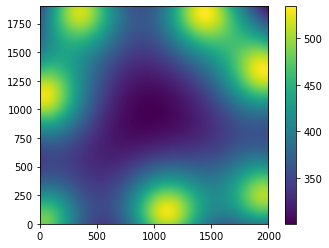

num_lights: 7
pos_x: [0.10999999999999999, 11.032857142857145, 19.889999999999983, 19.889999999999983, 14.318571428571433, 3.3957142857142895, 0.10999999999999999]
pos_y: [0.10449999999999998, 0.9143749999999808, 2.3650714285714387, 13.385357142857137, 18.764032258064535, 18.844361702127667, 11.124785714285716]


In [15]:
def f(n):
    function = unit_price * n + get_labor_cost(n)
    return function

def heatmap2d(arr: np.ndarray, data_x, data_y):
#     plt.plot(data_x, data_y, 'o')
    plt.imshow(arr.T, cmap='viridis')
    plt.colorbar()
#     plt.plot(data_x, data_y, 'o')
    plt.xlim(0,l*100)
    plt.ylim(0,w*100)
    plt.show()
    
def movement(data_x, data_y):
    for i in range(len(data_x)):
        plt.scatter(data_x[i], data_y[i])
    plt.xlim(0,l)
    plt.ylim(0,w)
    plt.show()

# Room is a 2d array of lxw, in cm, at reading level
room = np.zeros(shape=(l*100, w*100))
path_x = []
path_y = []
# print(path)
width = room.shape[1]
length = room.shape[0]

n=0
passed = False
while not passed:
    n += 1
    pos_x, pos_y = set_starting_points(n)
    path_x.append(np.zeros(w*100))
    path_y.append(np.zeros(w*100))

    done = False
    while not done:
        for j in range(0, length):
            for k in range(0, width):
                lux = get_lux(j/100, k/100, n)
                room[j, k] = lux  # pass meters to get_lux
                if lux < min_i:
#                     move_lights(n)
                    if not move(n, l*0.5, w*0.5):
                        done = True
                    for fixture in range(n):
                        path_x[fixture][k] = pos_x[fixture]
                        path_y[fixture][k] = pos_y[fixture]
                    passed = False
                    break
            else:
                continue
            break
        else:
            passed = True
            done = True

heatmap2d(room, path_x, path_y)
# movement(path_x, path_y)

print("num_lights: " + str(n))
print("pos_x: " + str(pos_x))
print("pos_y: " + str(pos_y))

(600,)

In [73]:
array = [0, 0, 0]
array[0] = [2,2]

In [74]:
array

[[2, 2], 0, 0]

In [115]:
def move(n, pos_x, pos_y, mid_x, mid_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        if x0 < mid_x:
            x = x0+0.01
            y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
        elif x0 > mid_x:
            x = x0-0.01
            y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
        else:
            x = mid_x
            y = mid_y
        pos_x[i] = x
        pos_y[i] = y
    return pos_x, pos_y

In [117]:
move(2, [0.01,9.99],[0.02,19.98], 5, 10)

0
less 0.01
1
more 9.99 19.98


([0.02, 9.98], [0.04, 19.96])

In [165]:
test = []

In [166]:
test.append([])

In [168]:
test.append([])

In [169]:
test

[[], []]

In [171]:
path_x.shape

(1000,)

### Clean

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Given, meters
h = 1
l = 4
w = 3
unit_price = 895
watts = 70661

# Constraints
min_z = 2
max_z = h
min_i = 300
max_i = 500

# Variables
# position, in metres of each light
num_lights = 0
# pos_x = []
# pos_y = []
# pos_z = 4
start_z = 4

path_x = []
path_y = []

In [3]:
def get_lux(point_x, point_y, n, pos_x, pos_y, pos_z):
    i = 0
    for m in range(n):
        i += watts / ((4 * np.pi) * (pos_z[m]**2 + (point_x - pos_x[m])**2 + (point_y - pos_y[m])**2))
    return i

def set_starting_points(n):
    pos_x = []
    pos_y = []
    p = (l+w)*2

    seg = p/n

    for i in range(n):
        dist = seg*i

        if dist <= l:
            pos_x.append(dist)
            pos_y.append(0)
        elif l < dist <= l+w:
            pos_x.append(l)
            pos_y.append(dist-l)
        elif l+w < dist <= (2*l)+w:
            pos_x.append(l-(dist-(l+w)))
            pos_y.append(w)
        elif (2*l)+w < dist:
            pos_x.append(0)
            pos_y.append(w-(dist-((2*l)+w)))
    return pos_x, pos_y, [start_z]*n

def check_move(n, mid_x, mid_y, pos_x, pos_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        if x0-0.1 <= mid_x <= x0+0.1 or y0-0.1 <= mid_y <= y0+0.1:
            print("add a light!")
            return True
    return False

def move(n, mid_x, mid_y, pos_x, pos_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        try:
            if x0 < mid_x:
                x = x0+0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
            else: # x0 > mid_x:
                x = x0-0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
        except:
            print(mid_x, x0, x0-0.1<=mid_x<=x0+0.1)
            raise ValueError
        
        pos_x[i] = x
        pos_y[i] = y
#         print(x, mid_x, y, mid_y)
    return pos_x, pos_y

def move_up(n, max_z, pos_z):
    for i in range(n):
        if pos_z[i] > max_z:
            raise ValueError("Lights are too strong for this room")
        pos_z[i] += 0.01
    return pos_z

In [4]:
# Plotting function
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr.T, cmap='viridis')
    plt.colorbar()
    plt.xlim(0,l*100)
    plt.ylim(0,w*100)
    plt.show()

def gather_moves(n, k, path_x, path_y, pos_x, pos_y):
    for fixture in range(n):
        path_x[fixture][k] = pos_x[fixture]
        path_y[fixture][k] = pos_y[fixture]

In [38]:
def optimize_lights():
    # Room is a 2d array of lxw, in cm, at reading level
    room = np.zeros(shape=(l*100, w*100))
    width = room.shape[1]
    length = room.shape[0]
    path_x = []
    path_y = []

    n=0
    passed = False
    start = time.time()
    num_lux_calcs = 0
    while not passed:
        n += 1
        pos_x, pos_y, pos_z = set_starting_points(n)
        print("starting points: ", pos_x, pos_y, pos_z)
        path_x.append(np.zeros(w*100))
        path_y.append(np.zeros(w*100))

        done = False
        while not done:
            for j in range(0, length):
                for k in range(0, width):
                    num_lux_calcs += 1
                    lux = get_lux(j/100, k/100, n, pos_x, pos_y, pos_z)
                    room[j, k] = lux  # pass meters to get_lux
                    if lux < min_i:
                        if check_move(n, l*0.5, w*0.5, pos_x, pos_y):
                            done = True
#                             print("nope", lux)
                        else:
                            pos_x, pos_y = move(n, l*0.5, w*0.5, pos_x, pos_y)
#                             print("moved", lux)
#                         gather_moves(n, k, path_x, path_y, pos_x, pos_y) # for plotting
                        passed = False
                        break
                    elif lux > max_i:
                        pos_z = move_up(n, h, pos_z)
#                         print("up", lux)
#                         print(room)
                        passed = False
                        break
                else:
                    continue
                break
            else:
                passed = True
                done = True
    return n, room, pos_x, pos_y, pos_z, time.time()-start, num_lux_calcs

starting points:  [0.0] [0] [4]
add a light!
starting points:  [0.0, 8] [0, 8.0] [4, 4]
add a light!
starting points:  [0.0, 8, 2.666666666666668] [0, 2.666666666666666, 8] [4, 4, 4]
add a light!
starting points:  [0.0, 8.0, 8, 0.0] [0, 0, 8.0, 8] [4, 4, 4, 4]


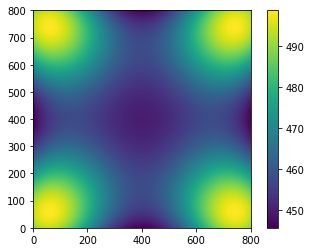

Number of lights: 4
Fixture 1: (0.0, 0, 4.239999999999995)
Fixture 2: (8.0, 0, 4.239999999999995)
Fixture 3: (8, 8.0, 4.239999999999995)
Fixture 4: (0.0, 8, 4.239999999999995)


In [54]:
# variables (more accessible)
h = 6
l = 8
w = 8

num_lights, room_lux, end_x, end_y, end_z, total_time, num_lux_calcs = optimize_lights()

heatmap2d(room_lux)

print("Number of lights: " + str(num_lights))
for i, point in enumerate(zip(end_x, end_y, end_z)):
    print("Fixture {}: {}".format(i+1, point))

In [55]:
time_graph.append(total_time)
lux_graph.append(num_lux_calcs)
area_graph.append(l*w)

In [41]:
time_graph = []
lux_graph = []
area_graph = []

In [53]:
lux_graph

[292639, 5186669, 2136369, 28176914, 1193115]

In [148]:
arr = np.array([[1, 2, 3]])
roo = np.array([[0, 0, 0], [0, 0, 0], [4, 4, 4]])

In [134]:
1 + arr.T

array([[2],
       [3],
       [4]])

In [137]:
roo + arr.T

array([[5, 5, 5],
       [6, 6, 6],
       [7, 7, 7]])

In [149]:
res = roo[0] + arr.T

In [153]:
res.T[0]

array([5, 6, 7])

In [208]:
res = [0]*len(arr.T)
for i in range(len(roo)):
    res[i] = [(roo[i] + arr.T).T[x] for x in range(len(arr.T))]
res = np.array(res)

In [166]:
[(roo[0] + arr.T).T[i] for i in range(len(arr.T))]

[array([5, 7, 9]), array([ 6,  8, 10]), array([ 7,  9, 11])]

In [176]:
res = [0]*len(roo)
for i in range(len(roo)):
    res[i]

In [195]:
res

[array([[ 5,  6,  7],
        [ 7,  8,  9],
        [ 9, 10, 11]]),
 array([[5, 6, 7],
        [5, 6, 7],
        [5, 6, 7]]),
 array([[5, 6, 7],
        [5, 6, 7],
        [5, 6, 7]])]

In [198]:
res = np.zeros(len(roo))

array([[[20, 24, 28],
        [28, 32, 36],
        [36, 40, 44]],

       [[20, 24, 28],
        [20, 24, 28],
        [20, 24, 28]],

       [[20, 24, 28],
        [20, 24, 28],
        [20, 24, 28]]])

In [224]:
points = [(ix,iy) for ix, row in enumerate(roo) for iy, i in enumerate(row)]

In [524]:
def set_starting_points(n, l, w):
    pos_x = np.array([])
    pos_y = np.array([])
    p = (l+w)*2

    seg = p/n

    for i in range(n):
        dist = seg*i

        if dist <= l:
            pos_x = np.append(pos_x, dist)
            pos_y = np.append(pos_y, 0)
        elif l < dist <= l+w:
            pos_x = np.append(pos_x, l)
            pos_y = np.append(pos_y, dist-l)
        elif l+w < dist <= (2*l)+w:
            pos_x = np.append(pos_x, l-(dist-(l+w)))
            pos_y = np.append(pos_y, w)
        elif (2*l)+w < dist:
            pos_x = np.append(pos_x, 0)
            pos_y = np.append(pos_y, w-(dist-((2*l)+w)))
    return pos_x, pos_y, np.array([float(start_z)]*n)

def lux_by_room(room, points, xi, yi, zi):
    for x, y in points:
        room[x,y] = np.sum(watts / ((4*np.pi)*(zi**2 + ((x/100) - xi)**2 + ((y/100) - yi)**2)))
    return room

def lux(points, xi, yi, zi):
    room = []
    for x, y in points:
        room.append(np.sum(watts / ((4*np.pi)*(zi**2 + ((x/100) - xi)**2 + ((y/100) - yi)**2))))
    return np.array(room)

def gradient(x0, y0, xi, yi, zi):
    Ix, Iy = 0,0
    for i in range(len(xi)):
        Ix += -watts*(x0-xi[i])/(2*np.pi*(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**2)
        Iy += -watts*(y0-yi[i])/(2*np.pi*(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**2)
    return np.array([[Ix], [Iy]])

def hessian(x0, y0, xi, yi, zi):
    Ixx, Iyy, Ixy = 0, 0, 0
    for i in range(len(xi)):
        Ixx += watts*((x0-xi[i])*(3*x0+xi[i])-zi[i]**2-(y0-yi[i])**2)/(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**3
        Iyy += watts*((y0-yi[i])*(3*y0+yi[i])-zi[i]**2-(x0-xi[i])**2)/(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**3
        Ixy += 2*watts*(x0-xi[i])*(y0-yi[i])/(np.pi*(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**3)
    return np.array([[Ixx, Ixy],[Ixy, Iyy]])

def newton(x0, y0, xi, yi, zi):
    grad = gradient(x0, y0, xi, yi, zi)
    hess = hessian(x0, y0, xi, yi, zi)
    min_point = np.ndarray.flatten(np.array([[x0], [y0]]) - np.dot(np.linalg.inv(hess),grad))
    return min_point[0], min_point[1]

def gather_points(l, w, pos_x, pos_y, pos_z):
    local_x, local_y = newton(l/2, w/2, pos_x, pos_y, pos_z)
    fixtures = zip(pos_x*100, pos_y*100)
    
    if local_x < 0 or local_x > l or local_y < 0 or local_y > w:
        return [(0, 0), (l*100, 0), (l*100, w*100), (0, w*100), *fixtures]
    return [(local_x*100, local_y*100), (0, 0), (l*100, 0), (l*100, w*100), (0, w*100), *fixtures]

def check_move(n, mid_x, mid_y, pos_x, pos_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        if x0-0.1 <= mid_x <= x0+0.1 or y0-0.1 <= mid_y <= y0+0.1:
            print("add a light!")
            return True
    return False

def move(n, mid_x, mid_y, pos_x, pos_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        try:
            if x0 < mid_x:
                x = x0+0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
            else: # x0 > mid_x:
                x = x0-0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
        except:
            print(mid_x, x0, x0-0.1<=mid_x<=x0+0.1)
            raise ValueError("Division by zero")
        
        pos_x[i] = x
        pos_y[i] = y
    return pos_x, pos_y

def move_up(n, max_z, pos_z):
    for i in range(n):
        if pos_z[i] > max_z:
            raise ValueError("Lights are too strong for this room")
        pos_z[i] += 0.05
    return pos_z

def heatmap(arr, l, w):
    plt.imshow(arr.T, cmap='viridis')
    plt.colorbar()
    plt.clim(vmax=500)
    plt.xlim(0,l*100)
    plt.ylim(0,w*100)
    plt.show()

def opt(l,w,h):
    room = np.zeros(shape=(l*100, w*100))
    points = [(ix,iy) for ix, row in enumerate(room) for iy, i in enumerate(row)]
    middle = (l/2, w/2)
    
    grad = np.zeros(2)
    hess = np.zeros(shape=(2,2))
    
    n = 0
    too_dim = True
    while too_dim:
        n += 1
        pos_x, pos_y, pos_z = set_starting_points(n, l, w)
        print("starting points: ", pos_x, pos_y, pos_z)
        
        iterate = True
        while iterate:
            check_points = gather_points(l, w, pos_x, pos_y, pos_z)            
            lux_points = lux(check_points, pos_x, pos_y, pos_z)

            if (lux_points < 300).any() or (lux_points > 500).any():
                if (lux_points < 300).any():
                    if check_move(n, l/2, w/2, pos_x, pos_y):
                        iterate = False
                    else:
                        pos_x, pos_y = move(n, l/2, w/2, pos_x, pos_y)
                if (lux_points > 500).any():
                    pos_z = move_up(n, h, pos_z)
            else:
                iterate = False
        too_dim = (lux_points < 300).any() or (lux_points > 500).any()
        
    print("Calculating Heat Map")
    room = lux_by_room(room, points, pos_x, pos_y, pos_z)
    heatmap(room, l, w)
    return n, pos_x, pos_y, pos_z

starting points:  [0.] [0.] [4.]
add a light!
starting points:  [ 0. 10.] [0. 7.] [4. 4.]
add a light!
starting points:  [ 0.         10.          4.33333333] [0.         1.33333333 7.        ] [4. 4. 4.]
add a light!
starting points:  [ 0.   8.5 10.   1.5] [0. 0. 7. 7.] [4. 4. 4. 4.]
Calculating Heat Map


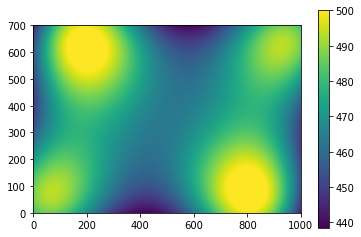

Room size: 10, 7, 6 (LxWxH)
Number of lights: 4
Fixture 1: (0.0, 0.0, 4.299999999999999)
Fixture 2: (8.5, 0.0, 4.299999999999999)
Fixture 3: (10.0, 7.0, 4.299999999999999)
Fixture 4: (1.5, 7.0, 4.299999999999999)


In [523]:
l, w, h = 10, 7, 6
num, x, y, z = opt(l, w, h)
print("Room size: {}, {}, {} (LxWxH)".format(l, w, h))
print("Number of lights: " + str(num))
for i, point in enumerate(zip(x, y, z)):
    print("Fixture {}: {}".format(i+1, point))

In [410]:
z

array([4])

In [345]:
def gradient(P, x0, y0, xi, yi, zi):
    Ix = -P*(x0-xi)/(2*np.pi*(zi**2+(x0-xi)**2+(y0-yi)**2)**2)
    Iy = -P*(y0-yi)/(2*np.pi*(zi**2+(x0-xi)**2+(y0-yi)**2)**2)
    return np.array([[Ix], [Iy]])

def hessian(P, x0, y0, xi, yi, zi):
    Ixx = P*((x0-xi)*(3*x0+xi)-zi**2-(y0-yi)**2)/(zi**2+(x0-xi)**2+(y0-yi)**2)**3
    Iyy = P*((y0-yi)*(3*y0+yi)-zi**2-(x0-xi)**2)/(zi**2+(x0-xi)**2+(y0-yi)**2)**3
    Ixy = 2*P*(x0-xi)*(y0-yi)/(np.pi*(zi**2+(x0-xi)**2+(y0-yi)**2)**3)
    return np.array([[Ixx, Ixy],[Ixy, Iyy]])

In [347]:
grad = gradient(watts, 5, 3.5, np.array([[5], [0]]), np.array([[3.5], [0]]), np.array([[4], [4]]))
hess = hessian(watts, 5, 3.5, np.array([[5], [0]]), np.array([[3.5], [0]]), np.array([[4], [4]]))

In [350]:
grad

array([[[[  0.        ],
         [-19.83036423]]],


       [[[ -0.        ],
         [-13.88125496]]]])

In [291]:
np.linalg.inv(hess)

array([[-0.04196604, -0.00878004],
       [-0.00878004, -0.04196604]])

In [316]:
def newton(P, x0, y0, xi, yi, zi):
    grad = gradient(P, x0, y0, xi, yi, zi)
    hess = hessian(P, x0, y0, xi, yi, zi)
    return np.array([[x0], [y0]]) - np.dot(np.linalg.inv(hess),grad)

## Good Section

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
watts = 70661
start_z = 4

In [3]:
# Helper Functions
def set_starting_points(n, l, w):
    pos_x = np.array([])
    pos_y = np.array([])
    p = (l+w)*2

    seg = p/n

    for i in range(n):
        dist = seg*i

        if dist <= l:
            pos_x = np.append(pos_x, dist)
            pos_y = np.append(pos_y, 0)
        elif l < dist <= l+w:
            pos_x = np.append(pos_x, l)
            pos_y = np.append(pos_y, dist-l)
        elif l+w < dist <= (2*l)+w:
            pos_x = np.append(pos_x, l-(dist-(l+w)))
            pos_y = np.append(pos_y, w)
        elif (2*l)+w < dist:
            pos_x = np.append(pos_x, 0)
            pos_y = np.append(pos_y, w-(dist-((2*l)+w)))
    return pos_x, pos_y, np.array([float(start_z)]*n)

def lux_by_room(room, points, xi, yi, zi):
    for x, y in points:
        room[x,y] = np.sum(watts / ((4*np.pi)*(zi**2 + ((x/100) - xi)**2 + ((y/100) - yi)**2)))
    return room

def lux(points, xi, yi, zi):
    room = []
    for x, y in points:
        room.append(np.sum(watts / ((4*np.pi)*(zi**2 + ((x/100) - xi)**2 + ((y/100) - yi)**2))))
    return np.array(room)

def gradient(x0, y0, xi, yi, zi):
    Ix, Iy = 0,0
    for i in range(len(xi)):
        Ix += -watts*(x0-xi[i])/(2*np.pi*(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**2)
        Iy += -watts*(y0-yi[i])/(2*np.pi*(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**2)
    return np.array([[Ix], [Iy]])

def hessian(x0, y0, xi, yi, zi):
    Ixx, Iyy, Ixy = 0, 0, 0
    for i in range(len(xi)):
        Ixx += watts*((x0-xi[i])*(3*x0+xi[i])-zi[i]**2-(y0-yi[i])**2)/(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**3
        Iyy += watts*((y0-yi[i])*(3*y0+yi[i])-zi[i]**2-(x0-xi[i])**2)/(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**3
        Ixy += 2*watts*(x0-xi[i])*(y0-yi[i])/(np.pi*(zi[i]**2+(x0-xi[i])**2+(y0-yi[i])**2)**3)
    return np.array([[Ixx, Ixy],[Ixy, Iyy]])

def newton(x0, y0, xi, yi, zi):
    grad = gradient(x0, y0, xi, yi, zi)
    hess = hessian(x0, y0, xi, yi, zi)
    min_point = np.ndarray.flatten(np.array([[x0], [y0]]) - np.dot(np.linalg.inv(hess),grad))
    return min_point[0], min_point[1]

def gather_points(l, w, pos_x, pos_y, pos_z):
    local_x, local_y = newton(l/2, w/2, pos_x, pos_y, pos_z)
    fixtures = zip(pos_x*100, pos_y*100)
    
    if local_x < 0 or local_x > l or local_y < 0 or local_y > w:
        return [(0, 0), (l*100, 0), (l*100, w*100), (0, w*100), *fixtures]
    return [(local_x*100, local_y*100), (0, 0), (l*100, 0), (l*100, w*100), (0, w*100), *fixtures]

def check_move(n, mid_x, mid_y, pos_x, pos_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        if x0-0.1 <= mid_x <= x0+0.1 or y0-0.1 <= mid_y <= y0+0.1:
            print("add a light!")
            return True
    return False

def move(n, mid_x, mid_y, pos_x, pos_y):
    for i in range(n):
        x0 = pos_x[i]
        y0 = pos_y[i]
        try:
            if x0 < mid_x:
                x = x0+0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
            else: # x0 > mid_x:
                x = x0-0.01
                y = ((mid_y-y0)/(mid_x-x0))*(x-x0) + y0
        except:
            print(mid_x, x0, x0-0.1<=mid_x<=x0+0.1)
            raise ValueError("Division by zero")
        
        pos_x[i] = x
        pos_y[i] = y
    return pos_x, pos_y

def move_up(n, max_z, pos_z):
    for i in range(n):
        if pos_z[i] > max_z:
            raise ValueError("Lights are too strong for this room")
        pos_z[i] += 0.05
    return pos_z

def heatmap(arr, l, w):
    plt.imshow(arr.T, cmap='viridis')
    plt.colorbar()
    plt.clim(300,500)
    plt.xlim(0,l*100)
    plt.ylim(0,w*100)
    plt.show()

In [44]:
def opt(l,w,h):
    room = np.zeros(shape=(l*100, w*100))
    points = [(ix,iy) for ix, row in enumerate(room) for iy, i in enumerate(row)]
    middle = (l/2, w/2)
    
    grad = np.zeros(2)
    hess = np.zeros(shape=(2,2))
    
    num_lux_calcs = 0
    start_time = time.time()
    n = 0
    too_dim = True
    while too_dim:
        n += 1
        pos_x, pos_y, pos_z = set_starting_points(n, l, w)
        print("starting points: ", pos_x, pos_y, pos_z)
        
        iterate = True
        while iterate:
#             number_iterations += 1
            check_points = gather_points(l, w, pos_x, pos_y, pos_z)            
            lux_points = lux(check_points, pos_x, pos_y, pos_z)
            num_lux_calcs += len(check_points)

            if (lux_points < 300).any() or (lux_points > 500).any():
                if (lux_points < 300).any():
                    if check_move(n, l/2, w/2, pos_x, pos_y):
                        iterate = False
                    else:
                        pos_x, pos_y = move(n, l/2, w/2, pos_x, pos_y)
                if (lux_points > 500).any():
                    pos_z = move_up(n, h, pos_z)
            else:
                iterate = False
        too_dim = (lux_points < 300).any() or (lux_points > 500).any()
        
    total_time = time.time() - start_time
    print("Calculating Heat Map")
    room = lux_by_room(room, points, pos_x, pos_y, pos_z)
#     heatmap(room, l, w)
    return n, pos_x, pos_y, pos_z, num_lux_calcs, total_time, room

In [45]:
def print_results(l, w, h, num, x, y, z, iterations, total_time, room):
    print("Room size: {}, {}, {} (LxWxH)".format(l, w, h))
    print("Optimal number of lights: {}".format(num))
    print("Found in {} iterations in {:.5f}ms".format(iterations, total_time))
    for i, point in enumerate(zip(x, y, z)):
        print("Fixture {}: ({:.3f}, {:.3f}, {:.3f})".format(i+1, point[0], point[1], point[2]))
    heatmap(room, l, w)

starting points:  [0.] [0.] [4.]
add a light!
starting points:  [0. 6.] [0. 6.] [4. 4.]
add a light!
starting points:  [0. 6. 2.] [0. 2. 6.] [4. 4. 4.]
Calculating Heat Map

Room size: 6, 6, 10 (LxWxH)
Optimal number of lights: 3
Found in 3852 iterations in 0.14013ms
Fixture 1: (0.000, 0.000, 4.650)
Fixture 2: (6.000, 2.000, 4.650)
Fixture 3: (2.000, 6.000, 4.650)


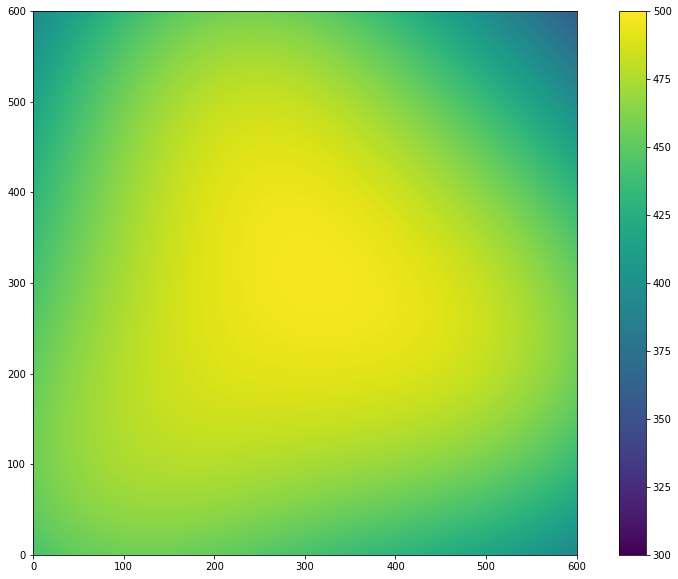

In [89]:
l, w, h = 6, 6, 10
num, x, y, z, num_lux_calcs, total_time, room = opt(l, w, h)
print()
print_results(l, w, h, num, x, y, z, num_lux_calcs, total_time, room)

Room size: 6, 6, 10 (LxWxH)
Optimal number of lights: 3
Found in 3852 iterations in 0.14013ms
Fixture 1: (0.000, 0.000, 4.650)
Fixture 2: (6.000, 2.000, 4.650)
Fixture 3: (2.000, 6.000, 4.650)


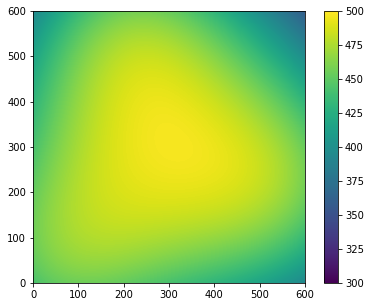

In [90]:
plt.rcParams['figure.figsize'] = [7, 5]
print_results(l, w, h, num, x, y, z, num_lux_calcs, total_time, room)

In [28]:
time_graph.append(total_time)
lux_graph.append(num_lux_calcs)
area_graph.append(l*w)

In [50]:
room.shape

(1000, 700)

In [16]:
time_graph = []
lux_graph = []
area_graph = []

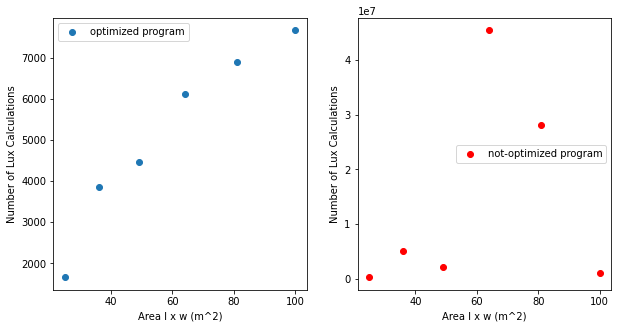

In [47]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121)
plt.scatter(area_graph, lux_graph, label="optimized program")
plt.legend()
plt.xlabel("Area l x w (m^2)")
plt.ylabel("Number of Lux Calculations")

plt.subplot(122)
plt.scatter(old_area_graph, old_lux_graph, c="red", label="not-optimized program")
plt.legend()
plt.xlabel("Area l x w (m^2)")
plt.ylabel("Number of Lux Calculations")

# plt.plot(area_graph, line, 'r--')
plt.show()

In [80]:
m*np.array(time_graph)+b

array([0.02092062, 0.02114568, 0.02119472, 0.0214515 , 0.02157751,
       0.02165678])

In [81]:
m

0.0031310597767274647

In [82]:
b

0.020679677575932864

In [83]:
time_graph

[0.0769510269165039,
 0.1488337516784668,
 0.16449522972106934,
 0.2465062141418457,
 0.28674912452697754,
 0.3120689392089844]

In [92]:
0.3*np.array(time_graph)+b

array([0.04376499, 0.0653298 , 0.07002825, 0.09463154, 0.10670441,
       0.11430036])

In [19]:
def give_me_a_straight_line_without_polyfit(x,y):
    
    # first augment the x vector with ones
    ones_vec = np.ones(x.shape)
    X = np.vstack([x, ones_vec]).T #.T as we want two columns
    
    # now plugin our least squares "solution"
    XX   = np.linalg.inv(np.dot(X.T, X))
    Xt_y = np.dot(X.T, y.T) #y.T as we want column vector
    beta = np.dot(XX, Xt_y)
    
    line = beta[0]*x + beta[1]
    return line

In [36]:
line = give_me_a_straight_line_without_polyfit(np.array(area_graph),np.array(time_graph))

In [96]:
line

array([0.09895617, 0.13339783, 0.17410161, 0.2210675 , 0.27429552,
       0.33378566])

In [22]:
area_graph

[30, 42, 48, 54, 60]

In [57]:
lux_graph

[292639, 5186669, 2136369, 28176914, 1193115, 45393444]

In [30]:
old_area_graph = [25, 36, 49, 64, 81, 100]
old_lux_graph = [292639, 5186669, 2136369, 45393444, 28176914, 1193115]

In [59]:
area_graph

[25, 36, 49, 81, 100, 64]

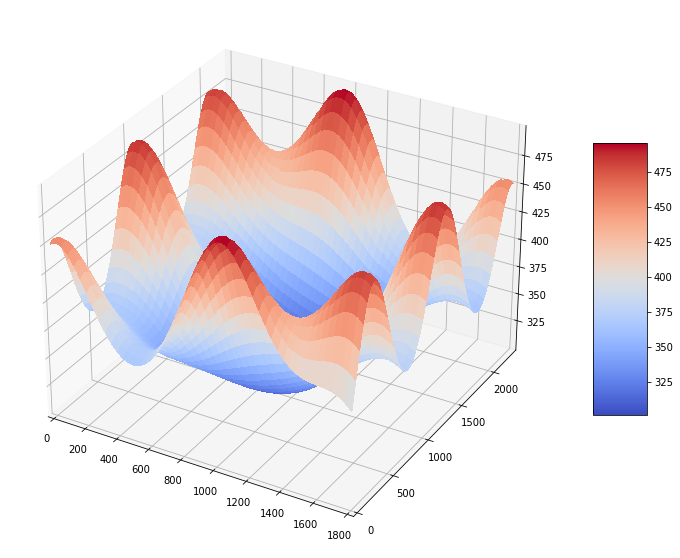

In [88]:
plt.rcParams['figure.figsize'] = [15, 10]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(0, 1800, 1)
Y = np.arange(0, 2300, 1)
X, Y = np.meshgrid(X, Y)
Z = room
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlim(0, 1800)
plt.ylim(0, 2300)
plt.show()

In [62]:
X.shape

(40, 60)

In [68]:
Z.shape

(40,)